In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv("fish.csv")

In [24]:
data.head()

,length,weight,type
0,8.618381,7.848030,tuna
1,2.522046,8.762507,tuna
2,2.035690,7.101971,tuna
3,6.695008,4.953932,salmon
4,9.834069,7.908453,tuna


In [28]:
data["type_binary"]= data["type"].apply(lambda t: 1 if t=="tuna" else 0)

In [29]:
data.drop("type", axis=1,inplace= True)

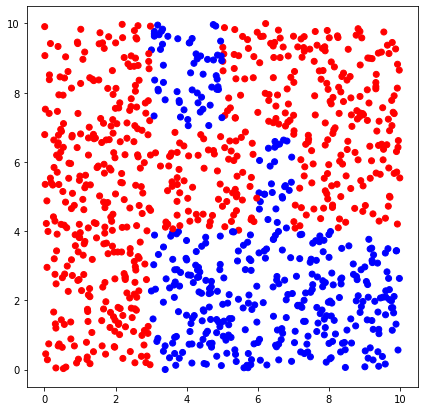

In [30]:
plt.figure(figsize=(7,7))
plt.scatter(data["length"], data["weight"], color=['red' if t==1 else 'blue' for t in data.type_binary])

In [32]:
data.head()

,length,weight,type_binary
0,8.618381,7.848030,1
1,2.522046,8.762507,1
2,2.035690,7.101971,1
3,6.695008,4.953932,0
4,9.834069,7.908453,1


In [80]:
dictionary = {"feature_name":1,"entropy":1,"feature_value":0} #a dictionary where we will store the effective features split

In [59]:
#List of features
features = ["length","weight"]

In [81]:
#function to calculate entropy value
def entropy_calc(df):
    p = np.mean(df["type_binary"])
    if p==0 or p==1:
        return 0
    return -p *np.log2(p) -(1-p)*np.log2(1-p)

In [82]:
#function to calculate entropy for a split on a given point
def entropy_split (df,f,t):
    left_df = df[df[f]<t]
    right_df = df[df[f]>=t]
    return (entropy_calc(left_df)*len(left_df["type_binary"]) + entropy_calc(right_df)*len(right_df["type_binary"]))/(len(df["type_binary"]))   

In [85]:
#split_2_df is the data frame on which the split is being calculated
split_2_df = data.copy()
split_2_df  = split_2_df[split_2_df["length"]>=3]#1iteration we had found length <3 is the split so taking cases on right
for f in features:
    counter=split_2_df[f].min()
    while (counter <= split_2_df[f].max()):
        if(entropy_split(split_2_df,f,counter)<dictionary["entropy"]):
            dictionary["entropy"]=entropy_split(split_2_df,f,counter)
            dictionary["feature_name"] = f
            dictionary["feature_value"] = counter
        counter = counter+.1
    

In [86]:
dictionary

{'feature_name': 'weight',
 'entropy': 0.426763555582736,
 'feature_value': 4.001260200000003}